In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import seaborn as sns
import umap

In [2]:
sns.set_theme(style='white', context='notebook', rc={'figure.figsize':(14,10)})

In [3]:
import ast

# load dataset
spotify_df = pd.read_csv("/Users/str1ct0wn3r/Documents/RP/data/Processed_data/Spotify_Subset/filtered_track_features_for_children.csv")

spotify_df['track_ids'] = spotify_df['track_ids'].apply(lambda x: [int(i) for i in ast.literal_eval(x)])

spotify_df = spotify_df.drop(['index'], axis=1)

spotify_df

,track_ids,spotify_uri,danceability,energy,instrumentalness,acousticness,tempo,valence,key,liveness,loudness,mode,speechiness,time_signature
0,"[36346257, 36346035, 47511869]",4wCmqSrbyCgxEXROQE6vtV,0.864,0.495,0.000133,0.591000,129.062,0.7200,0,0.0992,-7.036,1,0.0370,4
1,[32496162],4G8gkOterJn0Ywt6uhqbhp,0.448,0.784,0.000108,0.099900,136.239,0.2370,9,0.6680,-3.686,1,0.0625,4
2,"[33619193, 33609599, 33596930, 33614869, 33614...",1c8gk2PeTE04A1pIDH9YMk,0.730,0.769,0.000000,0.138000,104.948,0.5070,8,0.0473,-5.114,1,0.0298,4
3,[32083560],7w87IxuO7BDcJ3YUqCyMTT,0.733,0.710,0.115000,0.145000,127.975,0.9650,5,0.0956,-5.849,0,0.0292,4
4,[45222862],6mFkJmJqdDVQ1REhVfGgd1,0.481,0.262,0.011400,0.735000,122.861,0.3750,7,0.8320,-15.730,1,0.0414,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932270,[25940230],7eJzvDw5aevgjYsBeQzLPN,0.815,0.535,0.000321,0.013900,150.040,0.9540,11,0.1070,-11.916,0,0.0621,4
932271,[25957395],1wU7thArfjO4SwsPwQOSPG,0.554,0.429,0.000425,0.171000,114.987,0.6270,0,0.2030,-12.449,1,0.3230,4
932272,[25957581],2VifxaGtEp2Gxu753Y8PQQ,0.760,0.685,0.000104,0.014700,193.993,0.7710,9,0.0918,-4.952,1,0.0894,4
932273,[25957755],5JEs2no74V9HkrhFRDcaF1,0.677,0.884,0.000146,0.712000,115.440,0.7500,10,0.8310,-6.385,1,0.0619,4


In [4]:
from sklearn.decomposition import PCA

reducer = umap.UMAP(n_components=2)
#pca = PCA(n_components=2, svd_solver='full')


In [6]:
#one hot encode the key
one_hot_encoded = pd.get_dummies(spotify_df, columns=['key'], dtype='int')
#one_hot_encoded = spotify_df

one_hot_encoded

,index,track_id,spotify_uri,danceability,energy,instrumentalness,acousticness,tempo,valence,liveness,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,0,36346257,4wCmqSrbyCgxEXROQE6vtV,0.864,0.495,0.000133,0.591000,129.062,0.7200,0.0992,...,0,0,0,0,0,0,0,0,0,0
1,1,36346035,4wCmqSrbyCgxEXROQE6vtV,0.864,0.495,0.000133,0.591000,129.062,0.7200,0.0992,...,0,0,0,0,0,0,0,0,0,0
2,2,47511869,4wCmqSrbyCgxEXROQE6vtV,0.864,0.495,0.000133,0.591000,129.062,0.7200,0.0992,...,0,0,0,0,0,0,0,0,0,0
3,3,32496162,4G8gkOterJn0Ywt6uhqbhp,0.448,0.784,0.000108,0.099900,136.239,0.2370,0.6680,...,0,0,0,0,0,0,0,1,0,0
4,4,33619193,1c8gk2PeTE04A1pIDH9YMk,0.730,0.769,0.000000,0.138000,104.948,0.5070,0.0473,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047643,2440445,25940230,7eJzvDw5aevgjYsBeQzLPN,0.815,0.535,0.000321,0.013900,150.040,0.9540,0.1070,...,0,0,0,0,0,0,0,0,0,1
1047644,2440459,25957395,1wU7thArfjO4SwsPwQOSPG,0.554,0.429,0.000425,0.171000,114.987,0.6270,0.2030,...,0,0,0,0,0,0,0,0,0,0
1047645,2440460,25957581,2VifxaGtEp2Gxu753Y8PQQ,0.760,0.685,0.000104,0.014700,193.993,0.7710,0.0918,...,0,0,0,0,0,0,0,1,0,0
1047646,2440461,25957755,5JEs2no74V9HkrhFRDcaF1,0.677,0.884,0.000146,0.712000,115.440,0.7500,0.8310,...,0,0,0,0,0,0,0,0,1,0


In [86]:
# scale feature
music_data = spotify_df[["speechiness", "instrumentalness", "valence", "liveness", "energy", "tempo", "danceability", "acousticness"]].values
scaler = MinMaxScaler().fit(music_data[:,:])

scaled_music_data = scaler.transform(music_data)

scaled_music_data

array([[3.83022774e-02, 1.33000000e-04, 7.20000000e-01, ...,
        5.19836954e-01, 8.69215292e-01, 5.93373494e-01],
       [6.46997930e-02, 1.08000000e-04, 2.37000000e-01, ...,
        5.48744532e-01, 4.50704225e-01, 1.00301205e-01],
       [3.08488613e-02, 0.00000000e+00, 5.07000000e-01, ...,
        4.22710393e-01, 7.34406439e-01, 1.38554217e-01],
       ...,
       [9.25465839e-02, 1.04000000e-04, 7.71000000e-01, ...,
        7.81366555e-01, 7.64587525e-01, 1.47590361e-02],
       [6.40786749e-02, 1.46000000e-04, 7.50000000e-01, ...,
        4.64970154e-01, 6.81086519e-01, 7.14859438e-01],
       [8.93374741e-02, 0.00000000e+00, 6.45000000e-02, ...,
        5.23880874e-01, 5.09054326e-01, 5.80321285e-04]])

In [6]:
# load embedding
def get_embedding(type):
    if type == 0:
        return pd.read_csv("/Users/str1ct0wn3r/Documents/RP/data/Processed_data/Spotify_Subset/embedding.csv").to_numpy()
    if type == 1:
        embedding = reducer.fit_transform(scaled_music_data)
        pd.DataFrame(embedding).to_csv("/Users/str1ct0wn3r/Documents/RP/data/Processed_data/Spotify_Subset/embedding.csv", index=False)
        return embedding

In [7]:
embedding = get_embedding(0)
print(embedding)

[[10.02225   -0.936951 ]
 [ 9.166417   8.019954 ]
 [12.774389   3.563259 ]
 ...
 [14.329859   2.8685594]
 [ 8.699943   2.4474895]
 [10.021052   9.804597 ]]


Text(0.5, 1.0, 'Song features embedded in 2D space')

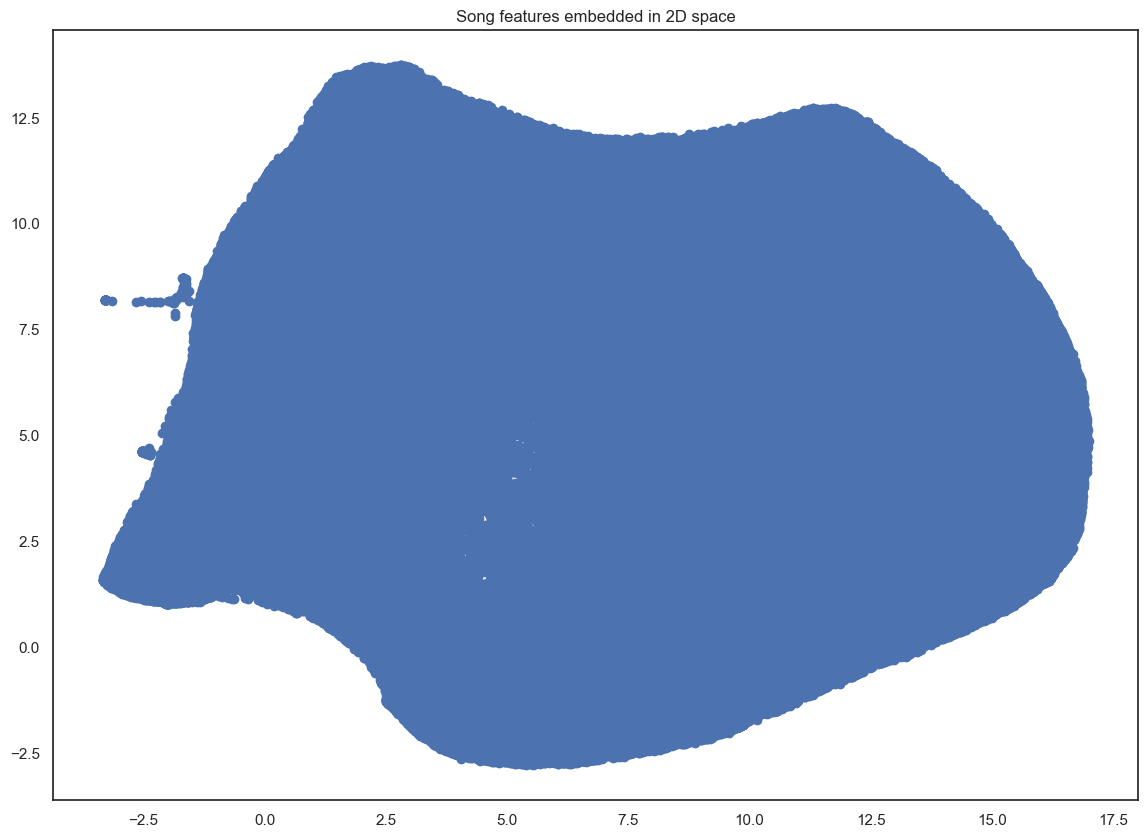

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

#fig = plt.figure()
#ax = fig.add_subplot(projection='3d')

plt.scatter(
    embedding[:, 0],
    embedding[:, 1]
    )
plt.title("Song features embedded in 2D space")

Text(0.5, 1.0, 'Clustering of the songs using k-means algorithm')

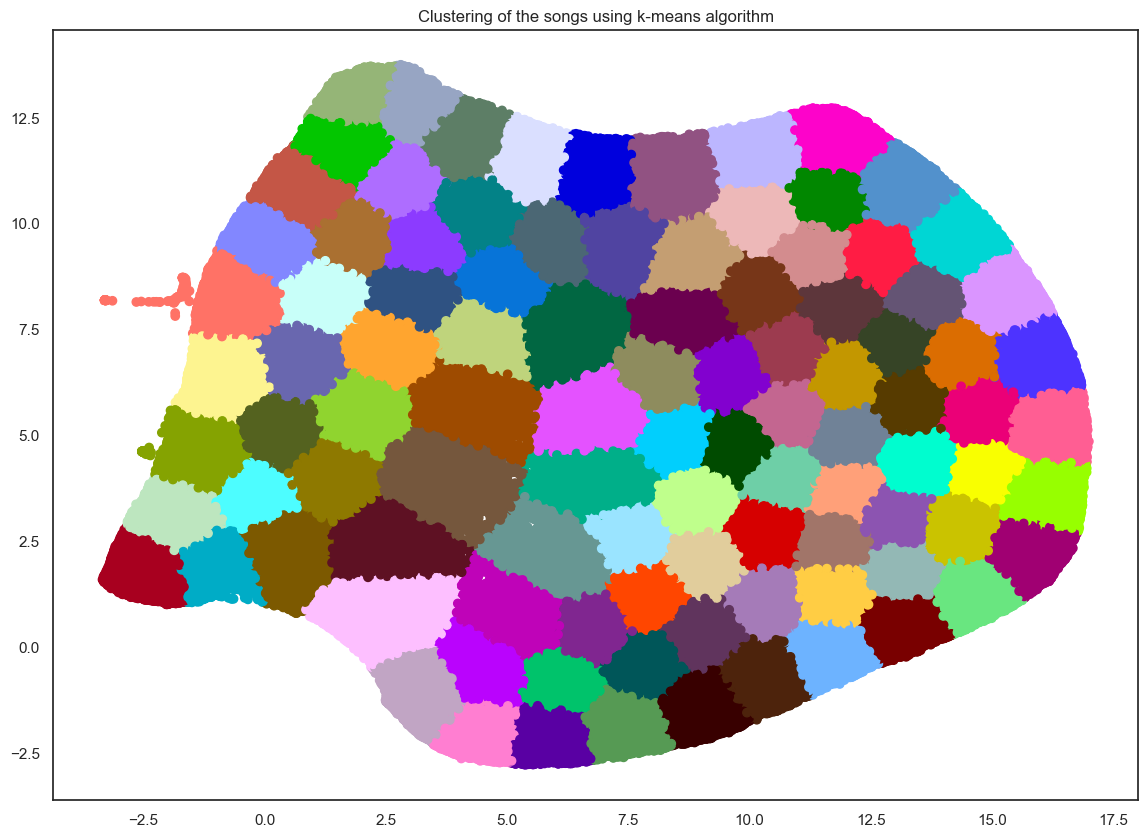

In [113]:
from sklearn.cluster import KMeans
import colorcet as cc

K = 100

kmeans = KMeans(n_clusters=K, random_state=0, n_init="auto").fit(embedding)

plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette(cc.glasbey, n_colors=K)[x] for x in kmeans.labels_]
)
plt.title("Clustering of the songs using k-means algorithm")

In [10]:
# load filtered listening events
filtered_df = pd.read_csv('/Users/str1ct0wn3r/Documents/RP/data/Filtered_Data/filtered_listening_events.csv')

filtered_df

,user_id,track_id,listening_count
0,68354,5696512,6
1,68354,9375482,6
2,68354,29424114,2
3,68354,32321441,6
4,68354,32495228,4
...,...,...,...
5455667,109991,20920521,3
5455668,109991,4443419,27
5455669,109991,11106170,17
5455670,109991,26141459,7


In [127]:
# display a user's listening events on top of the 2D graph

# songs listened by the first user
CUR_USER = 68354
only_current = set(filtered_df[(filtered_df['user_id'] == CUR_USER) & (filtered_df['listening_count'] > 40)]['track_id'])

# get indexes of those songs in embedding
indexes = spotify_df.index[spotify_df['track_ids'].apply(lambda x : bool(set(x) & only_current))]
print(len(indexes))

plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette(cc.glasbey, n_colors=K)[x] for x in kmeans.labels_]
)
plt.scatter(embedding[indexes, 0],
            embedding[indexes, 1],
            c='yellow')
plt.title("Tracks listened by a given user inside the clustering(user tracks are in red)")


10


In [123]:
# find the cluster that contains the highest amount of listened songs
def find_cluster(user_id, ignore_track):
    # songs listened by the first user
    only_current = set(filtered_df[(filtered_df['user_id'] == user_id) & (filtered_df['track_id'] != ignore_track)]['track_id'])
    
    # get clusters of those songs in embedding
    clusters = kmeans.labels_[spotify_df.index[spotify_df['track_ids'].apply(lambda x : bool(set(x) & only_current))]]
    
    print("Majority cluster", np.argmax(np.bincount(clusters)))
    print(clusters)

    return np.argmax(np.bincount(clusters))


In [124]:
# calculate average statistics of a cluster
def calculate_profile(cluster_id):
    #indexes of songs
    cur_df = np.take(spotify_df, np.argwhere(kmeans.labels_==cluster_id).reshape(-1), axis=0)[["speechiness", "instrumentalness", "valence", "liveness", "energy", "tempo", "danceability", "acousticness"]]
     
    cur_df=cur_df.mean()
    return cur_df.to_dict()
calculate_profile(3)

{'speechiness': 0.04517620444072057,
 'instrumentalness': 0.8655661918726434,
 'valence': 0.12865927943024716,
 'liveness': 0.11548530582320905,
 'energy': 0.10623118781943863,
 'tempo': 108.78299465856725,
 'danceability': 0.37694216589861756,
 'acousticness': 0.9536074570590699}

In [125]:
from scipy.spatial.distance import cosine

# perform the test for a user
def perform_test_for_user(user_id):

    # get the track_id of the song that has been listened the most
    value_cnts = filtered_df[filtered_df['user_id'] == user_id][['track_id', 'listening_count']].to_numpy()
    most_listened_track_id = value_cnts[np.argmax(value_cnts[:,1])]
    
    # find the cluster that represents the user the best
    user_cluster = find_cluster(user_id=user_id, ignore_track=most_listened_track_id[0])
    
    # calculate the profile for the user's cluster
    calculated_profile = calculate_profile(cluster_id=user_cluster)
    
    # get the feature data for the most listened track
    most_listened_track = spotify_df[spotify_df['track_ids'].apply(lambda x : most_listened_track_id[0] in set(x))][["speechiness", "instrumentalness", "valence", "liveness", "energy", "tempo", "danceability", "acousticness"]].to_dict(orient="records")[0]

    most_listened_track_to_list = np.array([list(most_listened_track.values())]).reshape(1, -1)
    calculated_profile_to_list = np.array([list(calculated_profile.values())]).reshape(1, -1)

    return cosine(scaler.transform(most_listened_track_to_list)[0], scaler.transform(calculated_profile_to_list)[0])
    
perform_test_for_user(109991)

Majority cluster 80
[80 76 76 76 48 41 98 80 32 33 21 80 80 63 33 78]


0.01981380229319729